In [62]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression  
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    auc
)
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [64]:
file_path = "default of credit card clients.xls"
df = pd.read_excel(file_path, header=1)  # first row is column names
print("Data shape:", df.shape)
df.head()

Data shape: (30000, 25)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [65]:
# Rename the target column for convenience
df.rename(columns={'default payment next month': 'default'}, inplace=True)

In [66]:
# Check for missing values
print("\nMissing values per column:\n", df.isnull().sum().sort_values(ascending=False))


Missing values per column:
 ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64


In [67]:
# Separate features and target
X = df.drop(columns=['ID', 'default'])
y = df['default']

print("Feature matrix shape:", X.shape)
print("Target variable distribution:", y.value_counts())

Feature matrix shape: (30000, 23)
Target variable distribution: default
0    23364
1     6636
Name: count, dtype: int64


In [68]:
# Scale features using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [69]:
# Setting up the parameter grid for GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}
# Parameter grid for Logistic Regression (simple)
param_grid_logreg = {
    'C': [0.01, 0.1, 1.0, 10.0]
}
# Three random states to make the model robust
random_states = [0, 1033, 2025]


Random state = 0
Best parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}

Test Accuracy: 0.8242

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.69      0.37      0.48      1327

    accuracy                           0.82      6000
   macro avg       0.77      0.66      0.69      6000
weighted avg       0.81      0.82      0.80      6000



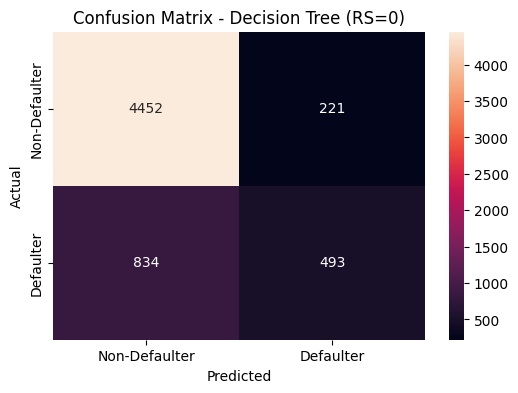

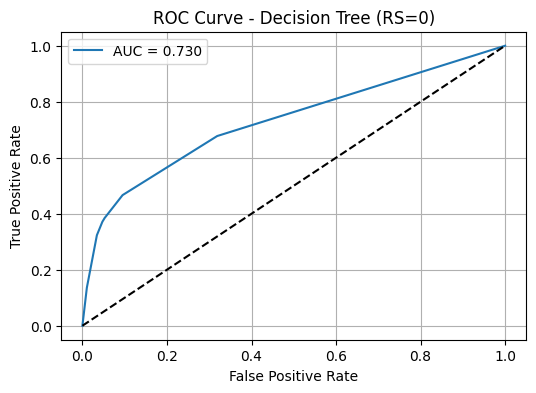


Random state = 1033
Best parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}

Test Accuracy: 0.8147

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.95      0.89      4673
           1       0.67      0.32      0.43      1327

    accuracy                           0.81      6000
   macro avg       0.75      0.64      0.66      6000
weighted avg       0.80      0.81      0.79      6000



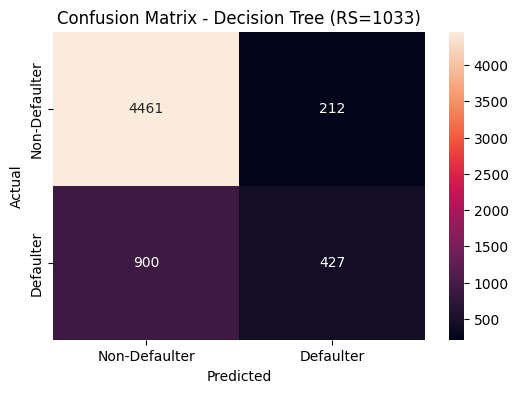

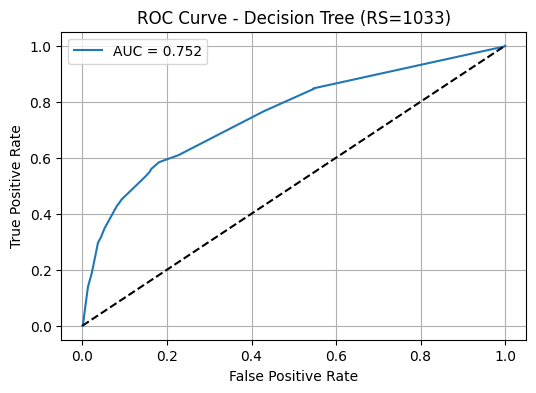


Random state = 2025
Best parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}

Test Accuracy: 0.8198

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.96      0.89      4673
           1       0.69      0.34      0.46      1327

    accuracy                           0.82      6000
   macro avg       0.76      0.65      0.67      6000
weighted avg       0.80      0.82      0.80      6000



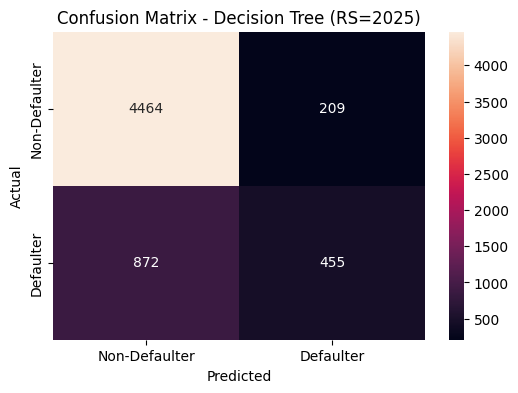

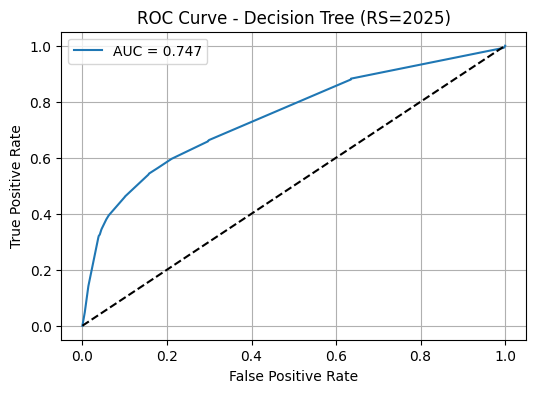

,model_name,random_state,accuracy,precision,recall,f1,AUC,threshold,TN,FP,FN,TP,fprate,fnrate,approval_rate,rejection_rate
0,Decision Tree,0,0.824167,0.690476,0.371515,0.483097,0.730084,0.376712,4452,221,834,493,0.047293,0.628485,0.881000,0.119000
1,Decision Tree,1033,0.814667,0.668232,0.321778,0.434385,0.752135,0.223714,4461,212,900,427,0.045367,0.678222,0.893500,0.106500
2,Decision Tree,2025,0.819833,0.685241,0.342879,0.457057,0.747196,0.250000,4464,209,872,455,0.044725,0.657121,0.889333,0.110667


In [70]:
def run_decision_tree_for_state(random_state, X, y, param_grid):
    """
    Train + evaluate a Decision Tree with a given random_state.
    """
    print(f"\n==============================")
    print(f"Random state = {random_state}")
    print(f"==============================")

    # 1. Split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=0.2,
        random_state=random_state,
        stratify=y
    )

    # 2. Base model
    dtree = DecisionTreeClassifier(random_state=random_state)

    # 3. Grid search
    grid_search = GridSearchCV(
        estimator=dtree,
        param_grid=param_grid,
        scoring="accuracy",
        cv=5,
    )
    grid_search.fit(X_train, y_train)

    best_dtree = grid_search.best_estimator_
    print("Best parameters:", grid_search.best_params_)

    # 4. Predictions
    y_pred = best_dtree.predict(X_test)
    y_prob = best_dtree.predict_proba(X_test)[:, 1]   # needed for ROC

    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nTest Accuracy: {accuracy:.4f}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    # 5. Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    TN, FP, FN, TP = cm.ravel()

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", xticklabels=["Non-Defaulter", "Defaulter"], yticklabels=["Non-Defaulter", "Defaulter"])
    plt.title(f"Confusion Matrix - Decision Tree (RS={random_state})")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # 6. ROC Curve + AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    auc_score = auc(fpr, tpr)

    # Finding the best threshold
    optimal_idx = np.argmax(tpr - fpr)
    optimal_threshold = thresholds[optimal_idx]


    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f"AUC = {auc_score:.3f}")
    plt.plot([0, 1], [0, 1], "k--")  # diagonal baseline
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - Decision Tree (RS={random_state})")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Extra metrics
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    fprate = FP / (FP + TN) if (FP + TN) > 0 else 0
    fnrate = FN / (FN + TP) if (FN + TP) > 0 else 0
    approval_rate = (y_pred == 0).mean()
    rejection_rate = (y_pred == 1).mean()
    
    result_row = {
        "model_name": "Decision Tree",
        "random_state": random_state,
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "AUC": auc_score,
        "threshold": optimal_threshold,
        "TN": TN,
        "FP": FP,
        "FN": FN,
        "TP": TP,
        "fprate": fprate,
        "fnrate": fnrate,
        "approval_rate": approval_rate,
        "rejection_rate": rejection_rate
    }
    return result_row, best_dtree


# ============================
# Run for all three random states
# ============================
all_results = []
all_models = {}   

for rs in random_states:
    model_row, trained_model = run_decision_tree_for_state(rs, X_scaled, y, param_grid)
    all_results.append(model_row)
    all_models[rs] = trained_model     


# Final results table – 3 rows (one per random_state)
results = pd.DataFrame(all_results)
results


Best Decision Tree model is with random_state = 0


C:\Users\83714\AppData\Local\Temp\ipykernel_12752\3470529496.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features, y=top_features.index, palette='viridis')


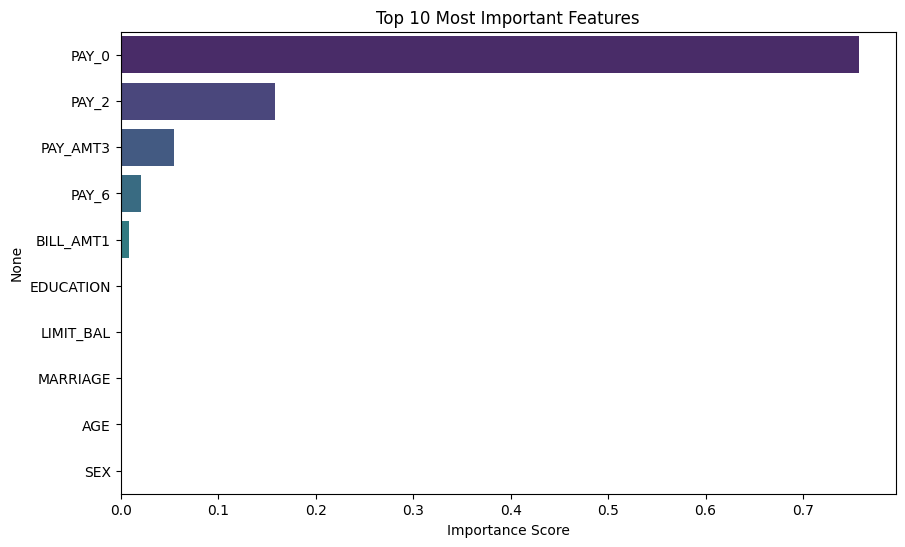

In [71]:
best_row = results.loc[results["f1"].idxmax()]
best_state = int(best_row["random_state"])
print("Best Decision Tree model is with random_state =", best_state)
best_model = all_models[best_state]


# Feature Importance Plot
importances = pd.Series(best_model.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False)[:10]

plt.figure(figsize=(10,6))
sns.barplot(x=top_features, y=top_features.index, palette='viridis')
plt.title("Top 10 Most Important Features")
plt.xlabel("Importance Score")
plt.show()

In [72]:
def run_logistic_for_state(random_state, X, y, param_grid):
    """
    Train + evaluate a Logistic Regression model with a given random_state.
    Uses:
      - train_test_split (test_size=0.2, stratify=y)
      - GridSearchCV (cv=5, scoring='accuracy')
      - ROC curve + AUC
      - Confusion matrix
      - Accuracy, Precision, Recall, F1
    """
    print(f"\n==============================")
    print(f"Logistic Regression | random_state = {random_state}")
    print(f"==============================")

    # 1. Train / test split 
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=0.2,
        random_state=random_state,
        stratify=y
    )

    print("Train size:", X_train.shape, "| Test size:", X_test.shape)

    # 2. Base Logistic Regression model
    logreg = LogisticRegression()

    # 3. Grid search (cv=5, scoring='accuracy', same as Decision Tree)
    grid_search = GridSearchCV(
        estimator=logreg,
        param_grid=param_grid,
        scoring="accuracy",
        cv=5,
    )
    grid_search.fit(X_train, y_train)

    best_logreg = grid_search.best_estimator_
    print("Best parameters:", grid_search.best_params_)

    # 4. Predictions
    y_pred = best_logreg.predict(X_test)
    y_prob = best_logreg.predict_proba(X_test)[:, 1]   # needed for ROC

    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nTest Accuracy: {accuracy:.4f}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    # 5. Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    TN, FP, FN, TP = cm.ravel()

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", xticklabels=["Non-Defaulter", "Defaulter"], yticklabels=["Non-Defaulter", "Defaulter"])
    plt.title(f"Confusion Matrix - Logistic Regression (RS={random_state})")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # 6. ROC Curve + AUC 
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    auc_score = auc(fpr, tpr)
    
    # Finding the best threshold
    optimal_idx = np.argmax(tpr - fpr)
    optimal_threshold = thresholds[optimal_idx]

    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f"AUC = {auc_score:.3f}")
    plt.plot([0, 1], [0, 1], "k--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - Logistic Regression (RS={random_state})")
    plt.legend()
    plt.grid(True)
    plt.show()

    # 7. Extra metrics 
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    fprate = FP / (FP + TN) if (FP + TN) > 0 else 0
    fnrate = FN / (FN + TP) if (FN + TP) > 0 else 0
    approval_rate = (y_pred == 0).mean()
    rejection_rate = (y_pred == 1).mean()

    # 8. One result row (same keys as Decision Tree results)
    result_row = {
        "model_name": "Logistic Regression",
        "random_state": random_state,
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "AUC": auc_score,
        "threshold": optimal_threshold,
        "TN": TN,
        "FP": FP,
        "FN": FN,
        "TP": TP,
        "fprate": fprate,
        "fnrate": fnrate,
        "approval_rate": approval_rate,
        "rejection_rate": rejection_rate
    }

    return result_row, best_logreg


Logistic Regression | random_state = 0
Train size: (24000, 23) | Test size: (6000, 23)
Best parameters: {'C': 10.0}

Test Accuracy: 0.8120

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.98      0.89      4673
           1       0.74      0.23      0.35      1327

    accuracy                           0.81      6000
   macro avg       0.78      0.60      0.62      6000
weighted avg       0.80      0.81      0.77      6000



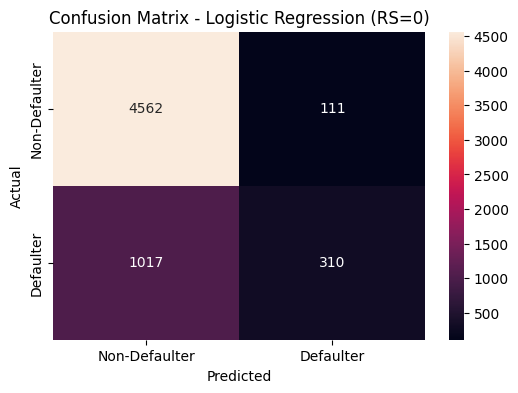

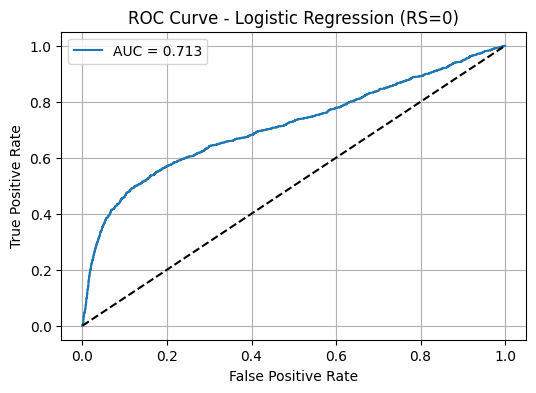


Logistic Regression | random_state = 1033
Train size: (24000, 23) | Test size: (6000, 23)
Best parameters: {'C': 10.0}

Test Accuracy: 0.8083

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.97      0.89      4673
           1       0.69      0.24      0.35      1327

    accuracy                           0.81      6000
   macro avg       0.76      0.60      0.62      6000
weighted avg       0.79      0.81      0.77      6000



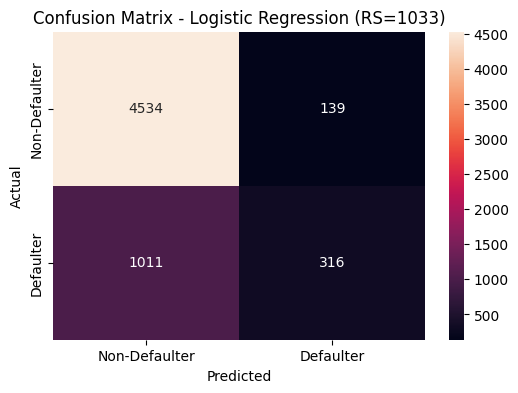

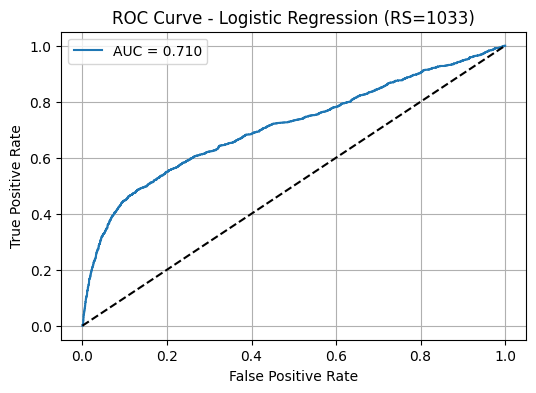


Logistic Regression | random_state = 2025
Train size: (24000, 23) | Test size: (6000, 23)
Best parameters: {'C': 10.0}

Test Accuracy: 0.8077

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.97      0.89      4673
           1       0.68      0.24      0.36      1327

    accuracy                           0.81      6000
   macro avg       0.75      0.61      0.62      6000
weighted avg       0.79      0.81      0.77      6000



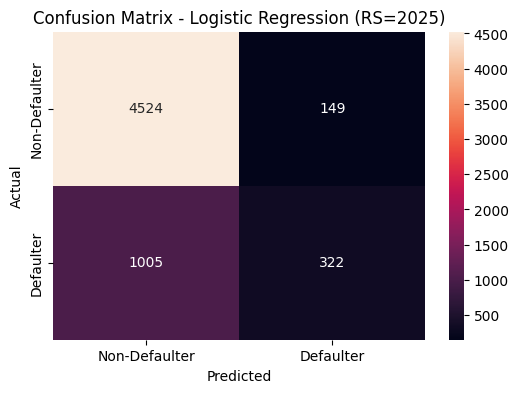

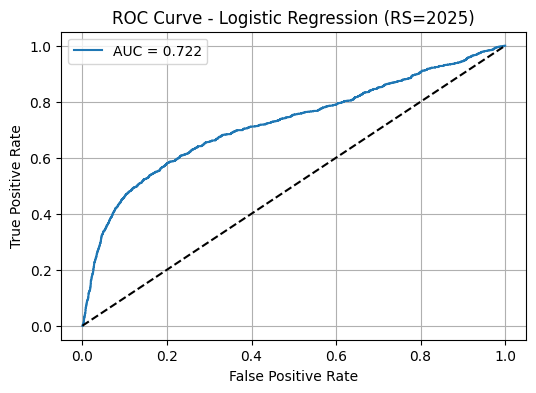

,model_name,random_state,accuracy,precision,recall,f1,AUC,threshold,TN,FP,FN,TP,fprate,fnrate,approval_rate,rejection_rate
0,Logistic Regression,0,0.812000,0.736342,0.233610,0.354691,0.713132,0.282075,4562,111,1017,310,0.023753,0.766390,0.929833,0.070167
1,Logistic Regression,1033,0.808333,0.694505,0.238131,0.354658,0.710059,0.278222,4534,139,1011,316,0.029745,0.761869,0.924167,0.075833
2,Logistic Regression,2025,0.807667,0.683652,0.242653,0.358176,0.721931,0.246248,4524,149,1005,322,0.031885,0.757347,0.921500,0.078500


In [73]:
# ============================
# Run Logistic Regression for all three random states
# ============================
all_results_logreg = []
all_models_logreg = {}   # to store best model per random_state

for rs in random_states:
    row, model = run_logistic_for_state(rs, X_scaled, y, param_grid_logreg)
    all_results_logreg.append(row)
    all_models_logreg[rs] = model

# Final results table – 3 rows (one per random_state)
results_logreg = pd.DataFrame(all_results_logreg)
results_logreg


In [74]:
best_row_logreg = results_logreg.loc[results_logreg["f1"].idxmax()]
best_state_logreg = int(best_row_logreg["random_state"])

print("Best Logistic Regression model is with random_state =", best_state_logreg)
best_logreg_model = all_models_logreg[best_state_logreg]
best_row_logreg


Best Logistic Regression model is with random_state = 2025


model_name        Logistic Regression
random_state                     2025
accuracy                     0.807667
precision                    0.683652
recall                       0.242653
f1                           0.358176
AUC                          0.721931
threshold                    0.246248
TN                               4524
FP                                149
FN                               1005
TP                                322
fprate                       0.031885
fnrate                       0.757347
approval_rate                  0.9215
rejection_rate                 0.0785
Name: 2, dtype: object

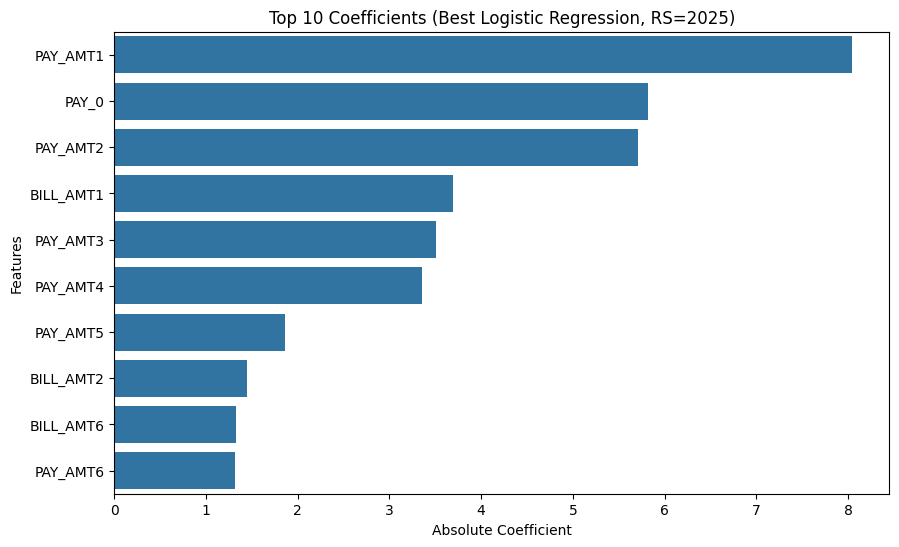

In [75]:
# Optional: Top 10 most important features for the best Logistic Regression model
coef_importance = pd.Series(
    np.abs(best_logreg_model.coef_[0]),
    index=X.columns
)

top_coef = coef_importance.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_coef, y=top_coef.index)
plt.title(f"Top 10 Coefficients (Best Logistic Regression, RS={best_state_logreg})")
plt.xlabel("Absolute Coefficient")
plt.ylabel("Features")
plt.show()


In [76]:
def run_nb_for_state(random_state, X, y):
    """
    Train + evaluate a Gaussian Naive Bayes model with a given random_state.
    Uses:
      - train_test_split (same as other models)
      - MinMax scaled data
      - ROC curve + AUC
      - Confusion matrix
      - Accuracy, Precision, Recall, F1
    """
    print(f"\n==============================")
    print(f"Naive Bayes | random_state = {random_state}")
    print(f"==============================")

    # 1. Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=0.2,
        random_state=random_state,
        stratify=y
    )

    print("Train size:", X_train.shape, "| Test size:", X_test.shape)

    # 2. Naive Bayes model (no hyperparameters)
    nb = GaussianNB()
    nb.fit(X_train, y_train)

    # 3. Predictions
    y_pred = nb.predict(X_test)
    y_prob = nb.predict_proba(X_test)[:, 1]

    # 4. Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    TN, FP, FN, TP = cm.ravel()

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", xticklabels=["Non-Defaulter", "Defaulter"], yticklabels=["Non-Defaulter", "Defaulter"])
    plt.title(f"Confusion Matrix - Naive Bayes (RS={random_state})")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # ROC curve + AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    auc_score = auc(fpr, tpr)

    # Finding the best threshold
    optimal_idx = np.argmax(tpr - fpr)
    optimal_threshold = thresholds[optimal_idx]

    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f"AUC = {auc_score:.3f}")
    plt.plot([0, 1], [0, 1], "k--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - Naive Bayes (RS={random_state})")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Extra metrics
    fprate = FP / (FP + TN) if (FP + TN) > 0 else 0
    fnrate = FN / (FN + TP) if (FN + TP) > 0 else 0
    approval_rate = (y_pred == 0).mean()
    rejection_rate = (y_pred == 1).mean()

    # Result row
    result_row = {
        "model_name": "Naive Bayes",
        "random_state": random_state,
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "AUC": auc_score,
        "threshold": optimal_threshold,
        "TN": TN,
        "FP": FP,
        "FN": FN,
        "TP": TP,
        "fprate": fprate,
        "fnrate": fnrate,
        "approval_rate": approval_rate,
        "rejection_rate": rejection_rate
    }

    return result_row, nb



Naive Bayes | random_state = 0
Train size: (24000, 23) | Test size: (6000, 23)


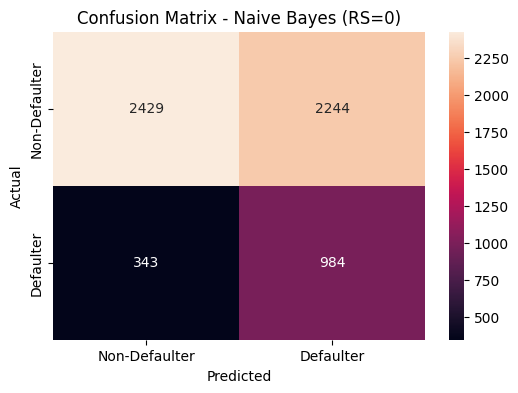

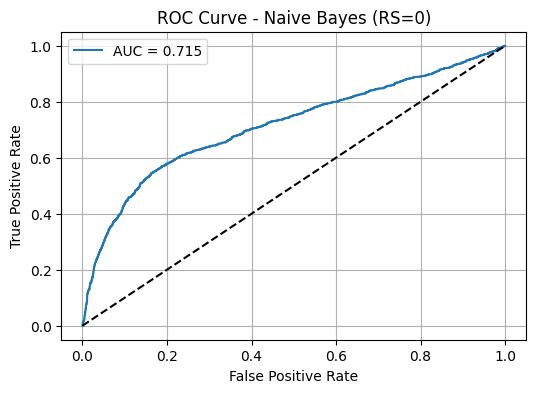


Naive Bayes | random_state = 1033
Train size: (24000, 23) | Test size: (6000, 23)


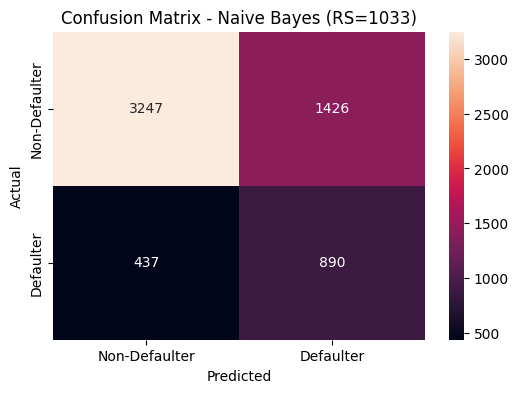

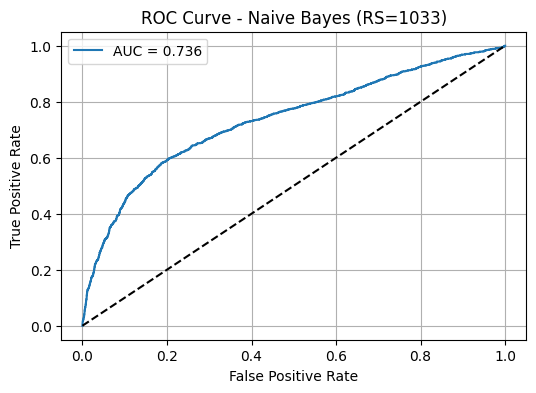


Naive Bayes | random_state = 2025
Train size: (24000, 23) | Test size: (6000, 23)


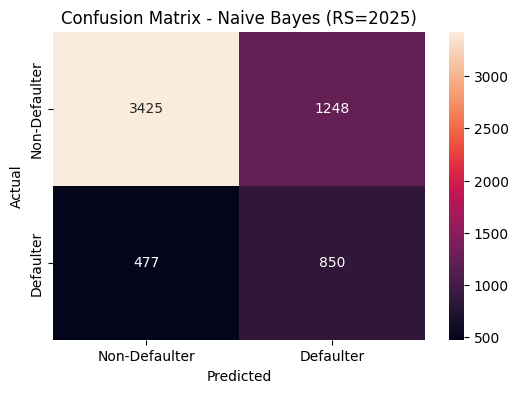

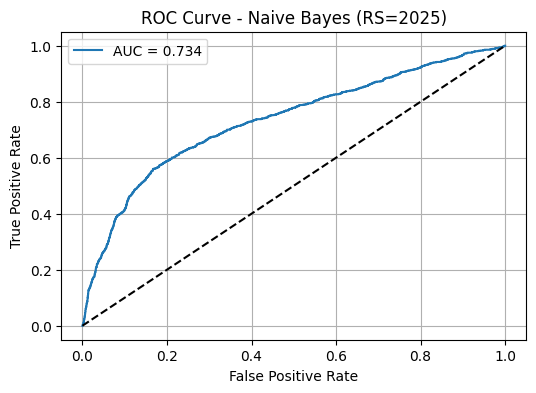

,model_name,random_state,accuracy,precision,recall,f1,AUC,threshold,TN,FP,FN,TP,fprate,fnrate,approval_rate,rejection_rate
0,Naive Bayes,0,0.568833,0.304833,0.741522,0.432053,0.715027,0.786797,2429,2244,343,984,0.480205,0.258478,0.462000,0.538000
1,Naive Bayes,1033,0.689500,0.384283,0.670686,0.488608,0.735828,0.631887,3247,1426,437,890,0.305157,0.329314,0.614000,0.386000
2,Naive Bayes,2025,0.712500,0.405148,0.640543,0.496350,0.733645,0.715887,3425,1248,477,850,0.267066,0.359457,0.650333,0.349667


In [77]:
# ============================
# Run Naive Bayes for all three random states
# ============================
all_results_nb = []
all_models_nb = {}   # to store NB model per random_state

for rs in random_states:
    row, model = run_nb_for_state(rs, X_scaled, y)
    all_results_nb.append(row)
    all_models_nb[rs] = model

results_nb = pd.DataFrame(all_results_nb)
results_nb


In [78]:
best_row_nb = results_nb.loc[results_nb["f1"].idxmax()]
best_state_nb = int(best_row_nb["random_state"])

print("Best Naive Bayes model is with random_state =", best_state_nb)
best_nb_model = all_models_nb[best_state_nb]
best_row_nb


Best Naive Bayes model is with random_state = 2025


model_name        Naive Bayes
random_state             2025
accuracy               0.7125
precision            0.405148
recall               0.640543
f1                    0.49635
AUC                  0.733645
threshold            0.715887
TN                       3425
FP                       1248
FN                        477
TP                        850
fprate               0.267066
fnrate               0.359457
approval_rate        0.650333
rejection_rate       0.349667
Name: 2, dtype: object

In [79]:
results_dt = results
# Combine all model results
combined_results = pd.concat(
    [results_dt, results_logreg, results_nb],
    ignore_index=True
)

# Show the combined table (each row = one random_state run)
combined_results


,model_name,random_state,accuracy,precision,recall,f1,AUC,threshold,TN,FP,FN,TP,fprate,fnrate,approval_rate,rejection_rate
0,Decision Tree,0,0.824167,0.690476,0.371515,0.483097,0.730084,0.376712,4452,221,834,493,0.047293,0.628485,0.881000,0.119000
1,Decision Tree,1033,0.814667,0.668232,0.321778,0.434385,0.752135,0.223714,4461,212,900,427,0.045367,0.678222,0.893500,0.106500
2,Decision Tree,2025,0.819833,0.685241,0.342879,0.457057,0.747196,0.250000,4464,209,872,455,0.044725,0.657121,0.889333,0.110667
3,Logistic Regression,0,0.812000,0.736342,0.233610,0.354691,0.713132,0.282075,4562,111,1017,310,0.023753,0.766390,0.929833,0.070167
4,Logistic Regression,1033,0.808333,0.694505,0.238131,0.354658,0.710059,0.278222,4534,139,1011,316,0.029745,0.761869,0.924167,0.075833
5,Logistic Regression,2025,0.807667,0.683652,0.242653,0.358176,0.721931,0.246248,4524,149,1005,322,0.031885,0.757347,0.921500,0.078500
6,Naive Bayes,0,0.568833,0.304833,0.741522,0.432053,0.715027,0.786797,2429,2244,343,984,0.480205,0.258478,0.462000,0.538000
7,Naive Bayes,1033,0.689500,0.384283,0.670686,0.488608,0.735828,0.631887,3247,1426,437,890,0.305157,0.329314,0.614000,0.386000
8,Naive Bayes,2025,0.712500,0.405148,0.640543,0.496350,0.733645,0.715887,3425,1248,477,850,0.267066,0.359457,0.650333,0.349667


In [80]:
# Best run per model according to F1
best_per_model = (
    combined_results
    .loc[combined_results.groupby("model_name")["f1"].idxmax()]
    .reset_index(drop=True)
)

print("Best run per model (by F1-score):")
best_per_model


Best run per model (by F1-score):


,model_name,random_state,accuracy,precision,recall,f1,AUC,threshold,TN,FP,FN,TP,fprate,fnrate,approval_rate,rejection_rate
0,Decision Tree,0,0.824167,0.690476,0.371515,0.483097,0.730084,0.376712,4452,221,834,493,0.047293,0.628485,0.881000,0.119000
1,Logistic Regression,2025,0.807667,0.683652,0.242653,0.358176,0.721931,0.246248,4524,149,1005,322,0.031885,0.757347,0.921500,0.078500
2,Naive Bayes,2025,0.712500,0.405148,0.640543,0.496350,0.733645,0.715887,3425,1248,477,850,0.267066,0.359457,0.650333,0.349667


In [81]:
best_overall_row = combined_results.loc[combined_results["f1"].idxmax()]
print("Best overall model & random_state (by F1-score):")
best_overall_row


Best overall model & random_state (by F1-score):


model_name        Naive Bayes
random_state             2025
accuracy               0.7125
precision            0.405148
recall               0.640543
f1                    0.49635
AUC                  0.733645
threshold            0.715887
TN                       3425
FP                       1248
FN                        477
TP                        850
fprate               0.267066
fnrate               0.359457
approval_rate        0.650333
rejection_rate       0.349667
Name: 8, dtype: object

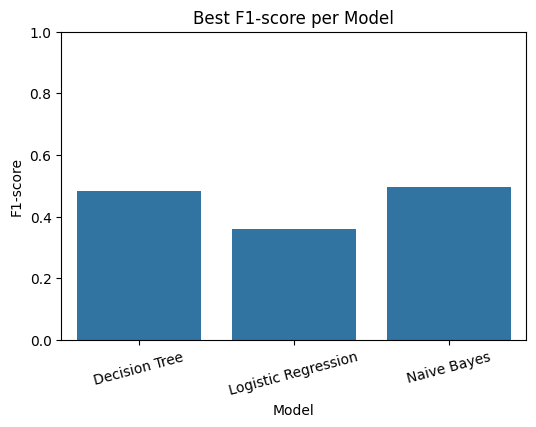

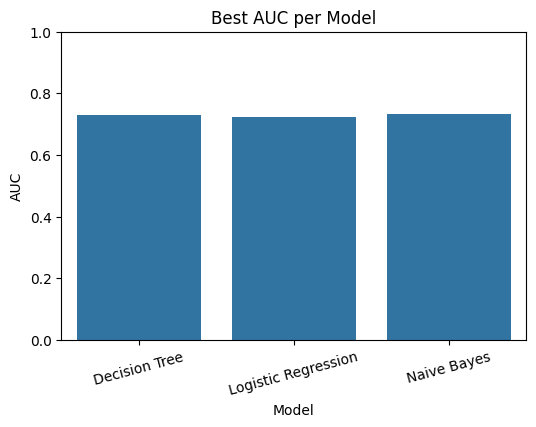

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

# Make sure we have best_per_model from above
# F1 comparison
plt.figure(figsize=(6,4))
sns.barplot(data=best_per_model, x="model_name", y="f1")
plt.title("Best F1-score per Model")
plt.xlabel("Model")
plt.ylabel("F1-score")
plt.xticks(rotation=15)
plt.ylim(0, 1)
plt.show()

# AUC comparison
plt.figure(figsize=(6,4))
sns.barplot(data=best_per_model, x="model_name", y="AUC")
plt.title("Best AUC per Model")
plt.xlabel("Model")
plt.ylabel("AUC")
plt.xticks(rotation=15)
plt.ylim(0, 1)
plt.show()
